# Trajectories Analyses
Módulos de Python para analizar trayectorias de dinámica molecular

*/ Update July 2018 /*

## MDAnalysis 
from https://www.mdanalysis.org

## MDTraj
from http://mdtraj.org

## PyTraj
from https://amber-md.github.io/pytraj/latest/index.html

## Prody
from http://prody.csb.pitt.edu

In [3]:
import MDAnalysis as mda
import mdtraj as mdt
import pytraj as mdp
import prody as pd

## Read trajectory files

In [4]:
from MDAnalysis.tests.datafiles import PSF, DCD

## MDAnalysis
u = mda.Universe(PSF, DCD)

## MDTraj
t = mdt.load(DCD, top=PSF)

## PyTraj
p = mdp.load(DCD, top=PSF)

In [4]:
## Prody method 1
DCD = "tutorial/ubq_wb_eq.dcd"
PSF = "tutorial/ubq_wb.psf"
PDB = "tutorial/ubq_wb.pdb"

q = pd.Trajectory(DCD)
pdb = pd.parsePDB(PDB)
q.link(pdb)

@> WARNING DCD header claims 0 frames, file size indicates there are actually 100 frames.
@> 7051 atoms and 1 coordinate set(s) were parsed in 0.05s.


In [6]:
## Prody method 2
DCD = "tutorial/ubq_wb_eq.dcd"
PSF = "tutorial/ubq_wb.psf"
PDB = "tutorial/ubq_wb.pdb"

ensemble = pd.parseDCD(DCD)
structure = pd.parsePDB(PDB)
ensemble.setAtoms(structure)
ensemble.setCoords(structure)

@> WARNING DCD header claims 0 frames, file size indicates there are actually 100 frames.
@> DCD file contains 100 coordinate sets for 7051 atoms.
@> DCD file was parsed in 0.01 seconds.
@> 8.08 MB parsed at input rate 689.97 MB/s.
@> 100 coordinate sets parsed at input rate 8542 frame/s.
@> 7051 atoms and 1 coordinate set(s) were parsed in 0.05s.


In [7]:
print(">>>MDAnalysis: Universe")
print(u)
print(">>>MDTraj: Trajectory")
print(t)
print(">>>MDAnalysis: Topology")
print(p)
print(">>>Prody: Ensemble")
print(ensemble)

>>>MDAnalysis: Universe
<Universe with 3341 atoms>
>>>MDTraj: Trajectory
<mdtraj.Trajectory with 98 frames, 3341 atoms, 214 residues, without unitcells>
>>>MDAnalysis: Topology
>>>Prody: Ensemble
Ensemble ubq_wb_eq (0:100:1)


In [66]:
### MICA MD files 
file_Mica = "/Users/alsalas/GDrive/DATAGEN/Trabajos/Informes_Trabajos/scFv_MICA/scFv_MICA_NAMD"
PSF = file_Mica + "/scfv_mica_wb_ions.psf"
DCD = file_Mica + "/scfv_mica_wb_ions.dm-01.dcd"
u2 = mda.Universe(PSF,DCD)
t2 = mdt.load(DCD, top=PSF)

## Vissualization Trajectory with NGLView

In [90]:
import nglview as nv
view = nv.show_pytraj(p)

# reset representation
view.representations = []
view.parameters = {'theme': 'dark'}
view.add_representation('licorice', selection='not hydrogen')
view.add_representation('cartoon')

view

A Jupyter Widget

## Subset from trajectory

In [8]:
## MDAnalysis subset for topology
atomos   = list(u.atoms[:3])
residuos = list(u.atoms[0:100].residues)
segids   = list(u.atoms.segments)

resnames = u.atoms[0:100].residues.resnames
resids   = u.atoms[0:100].residues.resids
res_list = list(zip(resnames, resids))

import pprint
print(">>Objetos Aminoácidos")
pprint.pprint(atomos)
print(">>Objetos Residuos")
pprint.pprint(residuos)
print(">>Objetos Segmentos")
pprint.pprint(segids)

print(">>Lista de Residuos")
pprint.pprint(res_list)

>>Objetos Aminoácidos
[<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>,
 <Atom 2: HT1 of type 2 of resname MET, resid 1 and segid 4AKE>,
 <Atom 3: HT2 of type 2 of resname MET, resid 1 and segid 4AKE>]
>>Objetos Residuos
[<Residue MET, 1>,
 <Residue ARG, 2>,
 <Residue ILE, 3>,
 <Residue ILE, 4>,
 <Residue LEU, 5>]
>>Objetos Segmentos
[<Segment 4AKE>]
>>Lista de Residuos
[('MET', 1), ('ARG', 2), ('ILE', 3), ('ILE', 4), ('LEU', 5)]


In [7]:
## MDTraj subset for topology
topology  = t.topology
print(topology)
print('Fifth atom: %s' % topology.atom(4))
print('All atoms: %s' % [atom for atom in topology.atoms][:3])

print('Second residue: %s' % t.topology.residue(1))
print('All residues: %s' % [residue for residue in t.topology.residues][:3])

atom = topology.atom(10)
print('''Hi! I am the %sth atom, and my name is %s. 
I am a %s atom with %s bonds. 
I am part of an %s residue.''' % ( atom.index, atom.name, atom.element.name, atom.n_bonds, atom.residue.name))

<mdtraj.Topology with 1 chains, 214 residues, 3341 atoms, 3365 bonds>
Fifth atom: MET1-CA
All atoms: [MET1-N, MET1-H, MET1-H2]
Second residue: ARG2
All residues: [MET1, ARG2, ILE3]
Hi! I am the 10th atom, and my name is HG3. 
I am a hydrogen atom with 1 bonds. 
I am part of an MET residue.


In [8]:
## PyTraj subset for topology
h_indices = mdp.select_atoms(p.top, '@CA')
n_indices = mdp.select_atoms(p.top, '@N')
print(h_indices)
print(n_indices)

[   4   21   45 ... 3297 3316 3335]
[   0   19   43 ... 3295 3314 3333]


In [9]:
## MDAnalysis
# Subset for trajectory is a generator
print (list(u.trajectory[:3]))

for uts in u.trajectory[::20]:
    print([x for x in dir(uts) if x.startswith("_")==False])
    break

for uts in u.trajectory[::20]:    
    print("Frame: {0:5d}, Time: {1:8.3f} ps".format(uts.frame, u.trajectory.time))
    print("Rgyr: {0:g} A".format(u.atoms.radius_of_gyration()))

[< Timestep 0 with unit cell dimensions [ 0.  0.  0. 90. 90. 90.] >, < Timestep 1 with unit cell dimensions [ 0.  0.  0. 90. 90. 90.] >, < Timestep 0 with unit cell dimensions [ 0.  0.  0. 90. 90. 90.] >]
['aux', 'copy', 'copy_slice', 'data', 'dimensions', 'dt', 'forces', 'frame', 'from_coordinates', 'from_timestep', 'has_forces', 'has_positions', 'has_velocities', 'n_atoms', 'order', 'positions', 'time', 'triclinic_dimensions', 'velocities', 'volume']
Frame:     0, Time:    1.000 ps
Rgyr: 16.669 A
Frame:    20, Time:   21.000 ps
Rgyr: 17.1491 A
Frame:    40, Time:   41.000 ps
Rgyr: 17.9416 A
Frame:    60, Time:   61.000 ps
Rgyr: 18.8433 A
Frame:    80, Time:   81.000 ps
Rgyr: 19.4571 A


In [10]:
## MDTraj
# Subset for trajectory
print (t[:3])
#print (u[:3]) #In MDAnalysis not work
print (t[-1])
print (t.xyz.shape)
print (t.time[0:10])
print (t.n_frames)

for tts in t[::20]:
    print([x for x in dir(tts) if x.startswith("_")==False])
    break

for tts in t[::20]:    
    print(tts)
    #print("Rgyr: {0:g} A".format(u.atoms.radius_of_gyration()))

<mdtraj.Trajectory with 3 frames, 3341 atoms, 214 residues, without unitcells>
<mdtraj.Trajectory with 1 frames, 3341 atoms, 214 residues, without unitcells>
(98, 3341, 3)
[0 1 2 3 4 5 6 7 8 9]
98
['atom_slice', 'center_coordinates', 'image_molecules', 'join', 'load', 'make_molecules_whole', 'n_atoms', 'n_chains', 'n_frames', 'n_residues', 'openmm_boxes', 'openmm_positions', 'remove_solvent', 'restrict_atoms', 'save', 'save_amberrst7', 'save_binpos', 'save_dcd', 'save_dtr', 'save_gro', 'save_hdf5', 'save_lammpstrj', 'save_lh5', 'save_mdcrd', 'save_netcdf', 'save_netcdfrst', 'save_pdb', 'save_tng', 'save_trr', 'save_xtc', 'save_xyz', 'slice', 'smooth', 'stack', 'superpose', 'time', 'timestep', 'top', 'topology', 'unitcell_angles', 'unitcell_lengths', 'unitcell_vectors', 'unitcell_volumes', 'xyz']
<mdtraj.Trajectory with 1 frames, 3341 atoms, 214 residues, without unitcells>
<mdtraj.Trajectory with 1 frames, 3341 atoms, 214 residues, without unitcells>
<mdtraj.Trajectory with 1 frames, 3

## Trajectory saving

In [17]:
## MDAnalysis
import MDAnalysis
from MDAnalysis.tests.datafiles import PDB, XTC

u = MDAnalysis.Universe(PDB, XTC)
protein = u.select_atoms("protein")
with MDAnalysis.Writer("protein.xtc", protein.n_atoms) as W:
    for ts in u.trajectory:
        W.write(protein)

In [11]:
## MDTraj
# the hdf5 format stores the topology inside the file for convenience
t[::2].save('halftraj.h5')

# the format will be parsed based on the extension, or you can call the
# format-specific save methods
t[0:10].save_dcd('first-ten-frames.dcd')

# Trajectory with specific subset of atoms
atoms_to_keep = [a.index for a in t.topology.atoms if a.name == 'CA']
t.restrict_atoms(atoms_to_keep)  # this acts inplace on the trajectory
t.save('CA-only.h5')

## Selecciones

In [166]:
## MDAnalysis
print('How many atoms?    %s' % len(u.atoms))
print('How many residues? %s' % len(u.residues))

How many atoms?    3341
How many residues? 214


In [150]:
## MDTraj
print('How many atoms?    %s' % t.n_atoms)
print('How many residues? %s' % t.n_residues)

frame_idx = 4 # zero indexed frame number
atom_idx = 9 # zero indexed atom index
print('Where is the fifth atom at the tenth frame?')
print('x: %s\ty: %s\tz: %s' % tuple(t.xyz[frame_idx, atom_idx,:]))

How many atoms?    3341
How many residues? 214
Where is the fifth atom at the tenth frame?
x: 1.062337	y: 1.0965732	z: -0.7430963


## Grupos de átomos

In [10]:
## MDAnalysis
CA = u.select_atoms("protein and name CA and segid AKE")

acidic = CA.select_atoms("resname ASP or resname GLU")
list(acidic.residues)

residues = u.select_atoms("around 4.0 resid 10").residues
list(residues)

[<Residue ALA, 8>,
 <Residue PRO, 9>,
 <Residue ALA, 11>,
 <Residue GLY, 12>,
 <Residue LYS, 13>,
 <Residue ILE, 116>,
 <Residue ARG, 119>,
 <Residue ILE, 120>,
 <Residue ARG, 123>]

In [171]:
## MDTraj
print(topology.select('resid 1 to 2'))
print(topology.select('name N and backbone')[:3])

selection = topology.select_expression('name CA and resid 1 to 2')
print(selection)

[19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42
 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61]
[ 0 19 43]
[atom.index for atom in topology.atoms if ((atom.name == 'CA') and (1 <= atom.residue.index <= 2))]


In [142]:
## PyTraj
#supposed we want to keep 100 closest solvents around protein
p2 = mdp.load_sample_data('tz2')

print([res.name for res in p.top.residues 
       if not res.is_solvent()][:5])

new_traj = mdp.closest(p2, mask=':1-13', n_solvents=100, dtype='trajectory')
print(new_traj)

[u'MET', u'ARG', u'ILE', u'ILE', u'LEU']
pytraj.Trajectory, 10 frames: 
Size: 0.000000 (GB)
<Topology: 520 atoms, 113 residues, 101 mols, PBC with box type = ortho>
           


## Centroides y Centro Geométricos

In [178]:
## MDAnalysis
domains = {
    'REC': u.select_atoms("protein and resid 10"),
    'LIG': u.select_atoms("protein and resid 20"),
}

cg = dict((name, dom.centroid()) for name,dom in domains.items())
cm = dict((name, dom.center_of_mass()) for name,dom in domains.items())

from numpy.linalg import norm
pprint.pprint(cg)
print(norm(cg['REC'] - cg['LIG']))

pprint.pprint(cm)
print(norm(cm['REC'] - cm['LIG']))


{'LIG': array([ 2.4370975,  9.491056 , -5.9062576], dtype=float32),
 'REC': array([-5.1044154,  1.6391476,  6.5575066], dtype=float32)}
16.549088
{'LIG': array([ 2.26281095,  9.56072377, -6.64804273]),
 'REC': array([-5.15036151,  2.00278469,  6.37477819])}
16.78306984407627


In [193]:
## MDtraj
atom_indices = [a.index for a in t.topology.atoms if a.element.symbol != 'H']
distances = np.empty((t.n_frames, t.n_frames))
for i in range(t.n_frames):
    distances[i] = mdt.rmsd(t, t, i, atom_indices=atom_indices)
print(len(distances[0]))
pprint.pprint(distances[0])

beta = 1
index = np.exp(-beta*distances / distances.std()).sum(axis=1).argmax()
print(index)
centroid = t[index]
print(centroid)

98
array([0.        , 0.05790596, 0.07711072, 0.09325491, 0.10271578,
       0.11264993, 0.12135917, 0.1314165 , 0.14044246, 0.14992088,
       0.15918143, 0.16945799, 0.17868125, 0.1866789 , 0.19653827,
       0.20442149, 0.21160948, 0.21692677, 0.22924   , 0.2362121 ,
       0.24730106, 0.25520948, 0.2643699 , 0.27094761, 0.28210837,
       0.29050988, 0.29802784, 0.30758226, 0.31464297, 0.32364997,
       0.33199939, 0.33915687, 0.34844589, 0.3557798 , 0.36207569,
       0.37016782, 0.37831214, 0.38292533, 0.39051402, 0.39724761,
       0.40436655, 0.41352344, 0.41842148, 0.4268057 , 0.4309746 ,
       0.4432182 , 0.45133263, 0.45944685, 0.47097462, 0.47341928,
       0.48110786, 0.48905426, 0.49942234, 0.50464773, 0.51397663,
       0.52006   , 0.52466607, 0.53282726, 0.54427058, 0.54785651,
       0.55191988, 0.56075227, 0.56751096, 0.57742584, 0.58370268,
       0.59132314, 0.6005733 , 0.604774  , 0.61841387, 0.62855178,
       0.63587266, 0.63998908, 0.6432578 , 0.645558  , 0.64

In [53]:
## PyTraj

# compute distance between COM of (residue 1 to 3) and COM of (residue 5 to 8)
mdp.distance(p,':1-3 :5-8')

array([14.26275895, 14.41829657, 14.49415384, ..., 15.16071003,
       15.17975672, 15.06458062])

## RMSD

In [194]:
## MDAnalysis
import MDAnalysis.analysis.rms
u = MDAnalysis.Universe(PSF, DCD)
bb = u.select_atoms('backbone')
A = bb.positions  # coordinates of first frame
u.trajectory[-1]      # forward to last frame
B = bb.positions  # coordinates of last frame
MDAnalysis.analysis.rms.rmsd(A, B)

6.852774844656239

In [28]:
## MDTraj
%matplotlib inline
import mdtraj as mdt
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
atom_indices = [a.index for a in t.topology.atoms if a.element.symbol != 'H']
distances = np.empty((t.n_frames, t.n_frames))

for i in range(t.n_frames):
    distances[i] = mdt.rmsd(t, t, i, atom_indices=atom_indices)
    #distances[i] = mdt.rmsd(t, t, i, atom_indices=atom_indices, precentered=True)
    #distances[i] = mdt.rmsd_qcp(t.xyz[0], t.xyz[i])
print('Max pairwise rmsd: %f nm' % np.max(distances))

Max pairwise rmsd: 0.688113 nm


In [29]:
# Clustering only accepts reduced form. Squareform's checks are too stringent
print(distances.shape)
print(distances.T.shape)
assert np.all(distances - distances.T < 1e-6)
reduced_distances = squareform(distances, checks=False)

linkage = scipy.cluster.hierarchy.linkage(reduced_distances, method='average')
plt.title('RMSD Average linkage hierarchical clustering')
_ = scipy.cluster.hierarchy.dendrogram(linkage, no_labels=True, count_sort='descendent')

(98, 98)
(98, 98)


AssertionError: 

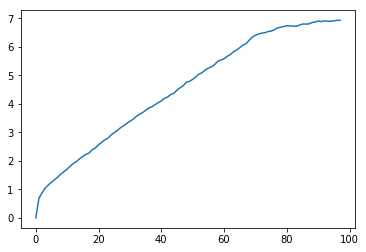

In [84]:
## PyTraj
mdp.rmsd(p, mask=['@CA', '@C', ':3-18@CA'], dtype='dataset')
RMSD = mdp.rmsd(p, ref=p[0])
plot(RMSD)

('rmsd_data', array([6.82214094, 6.71447546, 6.61249942, ..., 0.38602325, 0.34974394,
       0.        ]))

('rg_data', array([16.64499219, 16.6641098 , 16.73462499, ..., 19.51016481,
       19.53208123, 19.55331958]))


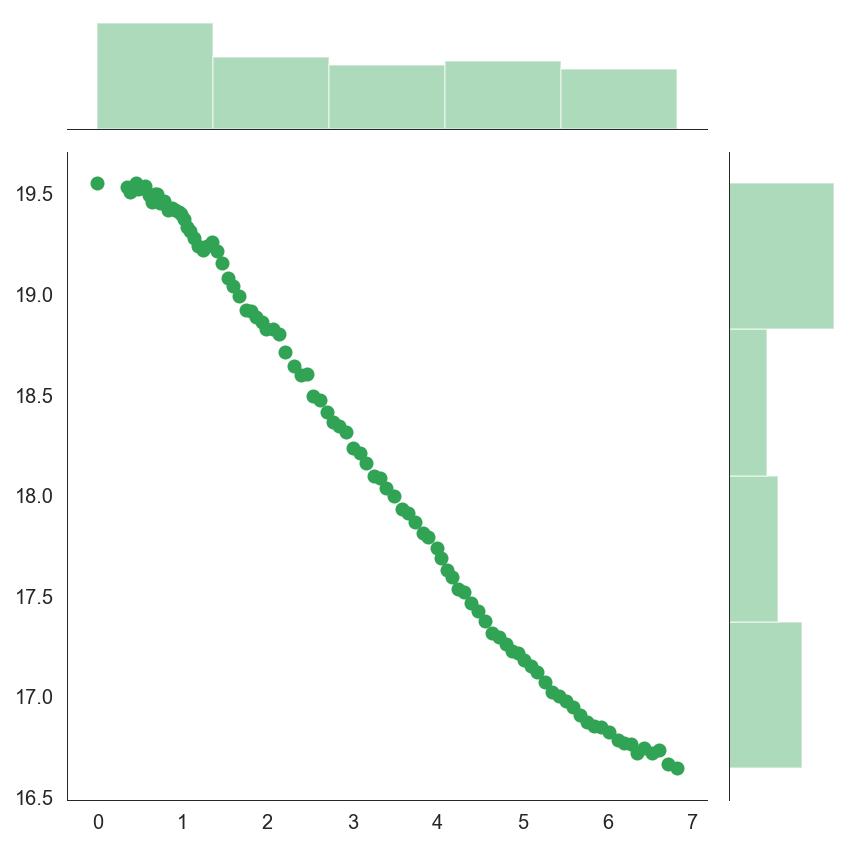

In [137]:
## PyTraj
# caculate rmsd to 1st frame, use only backbone atoms
rmsd_data = mdp.rmsd(p, ref=-1, mask='@C,N,O')

# calculate radgyr for all atoms
rg_data = mdp.radgyr(p)
print('rmsd_data', rmsd_data)
print("")
print('rg_data', rg_data)
#sns.jointplot(rmsd_data, rg_data, kind="hex", color="#4CB391")
sns.jointplot(rmsd_data, rg_data, color="#31a354")

In [27]:
# project a dynamic property on the structure using the B-factor (tempfactor) field
import numpy as np
import MDAnalysis
import MDAnalysis.analysis.align

from MDAnalysis.tests.datafiles import PSF, DCD


u = MDAnalysis.Universe(PSF, DCD)
ref = MDAnalysis.Universe(PSF, DCD)  # copy of u

CORE_selection = "resid 1-29 or resid 60-121 or resid 160-214"
pdbtrj = "adk_distance_bfac.pdb"


# workaround for Issue #1359 https://github.com/MDAnalysis/mdanalysis/issues/1359
# which will be fixed in 0.17.0
u.add_TopologyAttr(MDAnalysis.core.topologyattrs.Tempfactors(np.zeros(len(u.atoms))))


with MDAnalysis.Writer(pdbtrj, multiframe=True, bonds=None, n_atoms=u.atoms.n_atoms) as PDB:
    # reference coordinates: set to first frame
    ref.trajectory[0]
    # iterate through our trajectory
    for ts in u.trajectory:
        # superimpose on the reference CORE (at t=0)
        rmsd = MDAnalysis.analysis.align.alignto(u.atoms, ref.atoms, select=CORE_selection)
        distances = np.sqrt(np.sum((u.atoms.positions - ref.atoms.positions)**2, axis=1))
        # project displacement on structure via bfactor ("tempfactor") field
        u.atoms.tempfactors = distances
        PDB.write(u.atoms)
        print("Frame {0}: CORE RMSD before/after superposition: {1[0]:.1f} / {1[1]:.1f} A. "
              "min-max displacement: {2:.1f}...{3:.1f} A".format(ts.frame, rmsd, distances.min(), distances.max()))

print("Wrote PDB trajectory {0} with distances in bfactor field".format(pdbtrj))

/Users/alsalas/anaconda3/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:892: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  "".format(attrname, default))
/Users/alsalas/anaconda3/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:892: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  "".format(attrname, default))
/Users/alsalas/anaconda3/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:892: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  "".format(attrname, default))


Frame 0: CORE RMSD before/after superposition: 0.0 / 0.0 A. min-max displacement: 0.0...0.0 A
Frame 1: CORE RMSD before/after superposition: 0.7 / 0.7 A. min-max displacement: 0.0...3.5 A
Frame 2: CORE RMSD before/after superposition: 0.8 / 0.8 A. min-max displacement: 0.0...3.6 A
Frame 3: CORE RMSD before/after superposition: 1.0 / 1.0 A. min-max displacement: 0.0...4.2 A
Frame 4: CORE RMSD before/after superposition: 1.1 / 1.0 A. min-max displacement: 0.0...4.7 A
Frame 5: CORE RMSD before/after superposition: 1.1 / 1.1 A. min-max displacement: 0.0...6.3 A
Frame 6: CORE RMSD before/after superposition: 1.2 / 1.1 A. min-max displacement: 0.1...6.4 A
Frame 7: CORE RMSD before/after superposition: 1.3 / 1.2 A. min-max displacement: 0.1...7.2 A
Frame 8: CORE RMSD before/after superposition: 1.3 / 1.2 A. min-max displacement: 0.1...7.3 A
Frame 9: CORE RMSD before/after superposition: 1.4 / 1.3 A. min-max displacement: 0.0...6.6 A
Frame 10: CORE RMSD before/after superposition: 1.5 / 1.3 A.

In [74]:
import nglview as nv
traj = mdp.load("/Users/alsalas/GDrive/Jupyter/Dynamics/Trayectorias/adk_distance_bfac.pdb")
print(traj)
view = nv.show_pytraj(traj)
view._set_color_by_residue(colors="blue")
# reset representation
view

pytraj.Trajectory, 98 frames: 
Size: 0.007318 (GB)
<Topology: 3341 atoms, 214 residues, 1 mols, non-PBC>
           


A Jupyter Widget

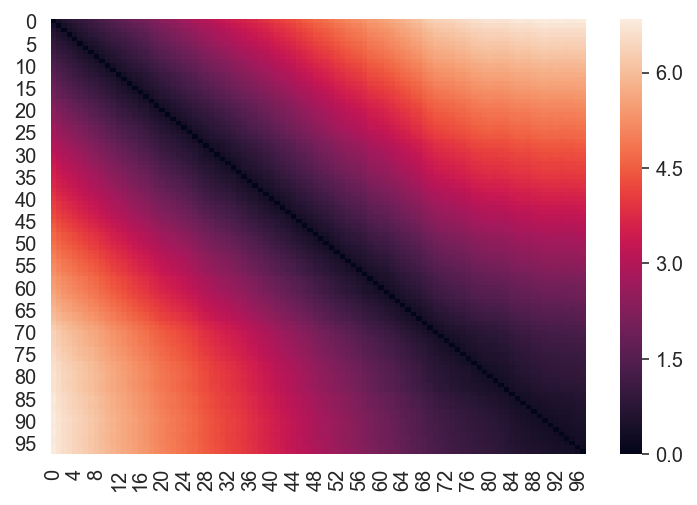

In [116]:
## PyTraj
# Pairwise RMSD
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
import matplotlib

mat = mdp.pairwise_rmsd(p, '@CA')
sns.heatmap(mat)

In [153]:
## Prody
ensemble.superpose()
# All atoms
rmsd = ensemble.getRMSDs()
rmsf = ensemble.getRMSFs()
# Calpha
ensemble.setAtoms(structure.calpha)
ensemble.superpose()
rmsd_ca = ensemble.getRMSDs()
rmsf_ca = ensemble.getRMSFs()

@> Superposition completed in 0.19 seconds.
@> Superposition completed in 0.20 seconds.


@> WARNING DCD header claims 0 frames, file size indicates there are actually 100 frames.
@> 7051 atoms and 1 coordinate set(s) were parsed in 0.06s.


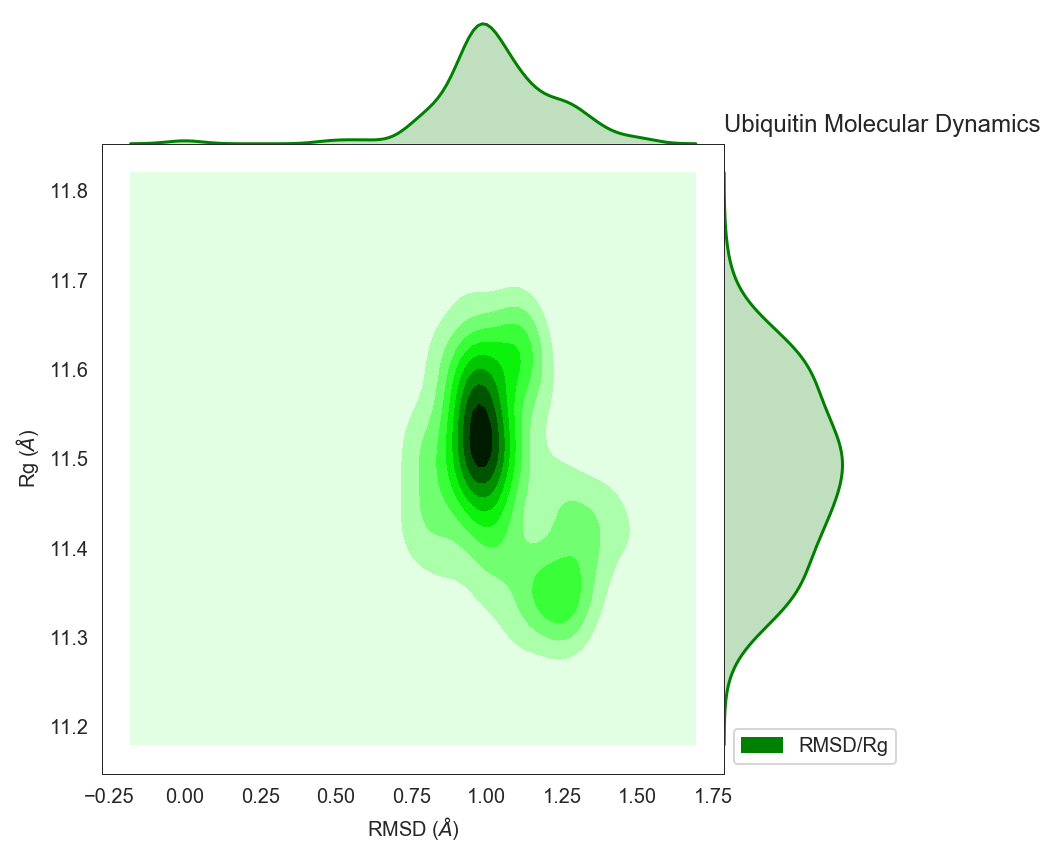

In [228]:
## Prody
# caculate rmsd to 1st frame, use only backbone atoms

traj = pd.Trajectory('/Users/alsalas/GDrive/Jupyter/Dynamics/Trayectorias/run/ubq_wb_eq.dcd')
structure = pd.parsePDB('/Users/alsalas/GDrive/Jupyter/Dynamics/Trayectorias/common/ubq_wb.pdb')
traj.link(structure)
traj.setAtoms(structure.calpha)

import numpy as np
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

rg_data = np.zeros(len(traj))
rmsd_data = np.zeros(len(traj))
for i, frame in enumerate(traj):
    rg_data[i] = pd.calcGyradius( frame )
    frame.superpose()
    rmsd_data[i] = frame.getRMSD()    

df = pandas.DataFrame({"RMSD":rmsd_data, "Rg":rg_data})
#sns.jointplot(rmsd_data, rg_data, kind="hex", color="#4CB391")
#sns.jointplot(rmsd_data, rg_data, color="#31a354")
plot1 = sns.jointplot(x="RMSD", y="Rg", data=df, kind="kde", space=0, color="g")
plot1.set_axis_labels("RMSD ($\AA$)", "Rg ($\AA$)")

plt.title('Ubiquitin Molecular Dynamics', loc="left")
red_patch = mpatches.Patch(color='Green', label='RMSD/Rg')
plt.legend(handles=[red_patch], loc=3)
plt.show()

## RMSF

Text(0,0.5,'RMSF ($\\AA$)')

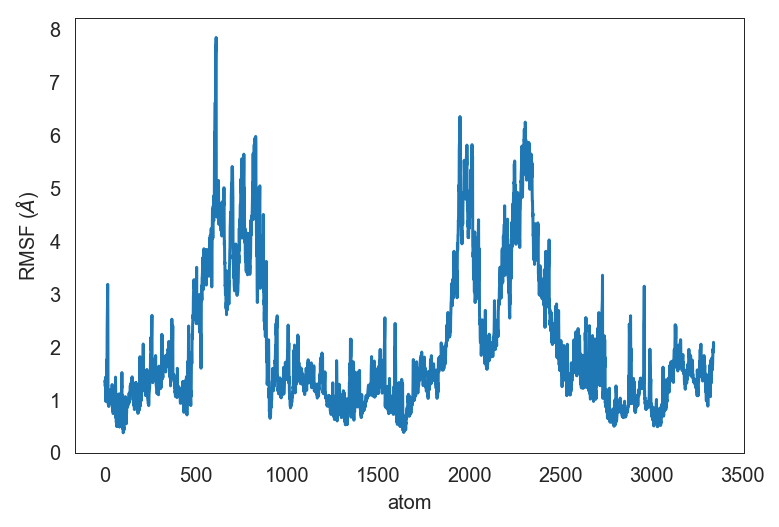

In [236]:
## PyTraj
# superimpose to 1st frame
mdp.superpose(p, ref=0)

# compute rmsf
rmsf_data = mdp.rmsf(p)
rmsf_data

%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

plt.plot(rmsf_data.T[0], rmsf_data.T[1])
plt.xlabel('atom')
plt.ylabel('RMSF ($\AA$)')

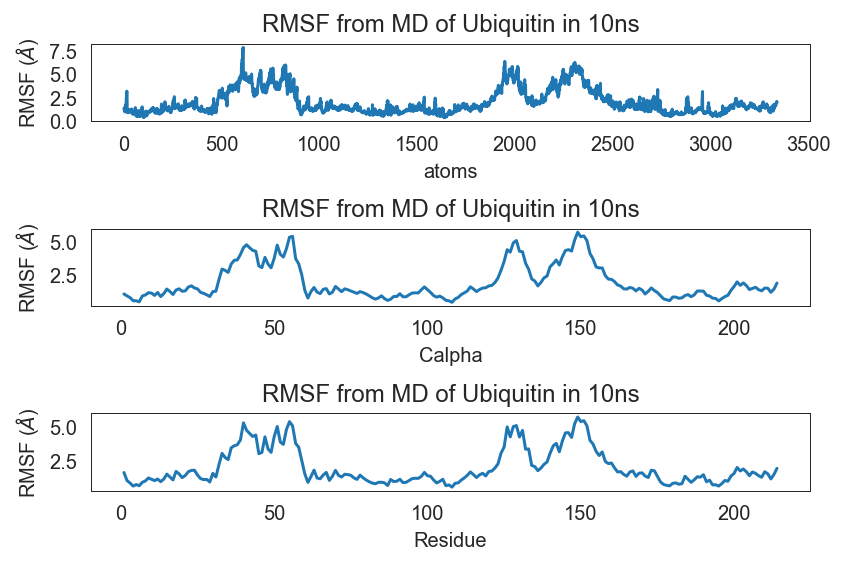

In [270]:
## PyTraj
# superimpose to 1st frame
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import pandas

# RMSF all atom
mdp.superpose(p, ref=0)

# compute rmsf
rmsf_data = mdp.rmsf(p)

df = pandas.DataFrame({"atoms":rmsf_data.T[0],
                       "RMSF": rmsf_data.T[1]}
                     )
# RMSF calpha
rmsf_data2 = mdp.rmsf(p['@CA'])

df2 = pandas.DataFrame({"calpha":rmsf_data2.T[0],
                       "RMSF": rmsf_data2.T[1]}
                     )

# RMSF calpha
rmsf_data3 = mdp.rmsf(traj=p, mask='',
                      top=None, dtype='ndarray',
                      frame_indices=None, options='byres')

df3 = pandas.DataFrame({"residue":rmsf_data3.T[0],
                       "RMSF": rmsf_data3.T[1]}
                     )

# First subplot
with sns.axes_style("white"):
    plt.subplot(311)
    facet = sns.lineplot(data=df, x='atoms', y='RMSF')
    plt.xlabel('atoms')
    plt.ylabel('RMSF ($\AA$)')
    plt.title("RMSF from MD of Ubiquitin in 10ns")

with sns.axes_style("white"):
    plt.subplot(312)
    facet = sns.lineplot(data=df2, x='calpha', y='RMSF')
    plt.xlabel('Calpha')
    plt.ylabel('RMSF ($\AA$)')
    plt.title("RMSF from MD of Ubiquitin in 10ns")

with sns.axes_style("white"):
    plt.subplot(313)
    facet = sns.lineplot(data=df3, x='residue', y='RMSF')
    plt.xlabel('Residue')
    plt.ylabel('RMSF ($\AA$)')
    plt.title("RMSF from MD of Ubiquitin in 10ns")

plt.tight_layout()

## DSPP Analysis

In [60]:
## PyTraj
pdb = mdp.load_pdb_rcsb("1l2y")
result = mdp.dssp(pdb)
result

(array([u'ASN:1', u'LEU:2', u'TYR:3', ..., u'PRO:18', u'PRO:19', u'SER:20'],
       dtype='<U6'), array([['0', 'H', 'H', ..., '0', '0', '0'],
        ['0', 'T', 'H', ..., '0', '0', '0'],
        ['0', '0', 'H', ..., '0', '0', '0'],
        ...,
        ['0', 'H', 'H', ..., '0', '0', '0'],
        ['0', '0', 'H', ..., '0', '0', '0'],
        ['0', 'T', 'H', ..., '0', '0', '0']], dtype='|S1'), <pytraj.DatasetList with 8 datasets>
none_avg
[0.3  0.25 0.35 ... 0.3  0.3  0.3 ]

para_avg
[0. 0. 0. ... 0. 0. 0.]

anti_avg
[0. 0. 0. ... 0. 0. 0.]
...

turn_avg
[0.1  0.15 0.1  ... 0.1  0.05 0.15]

bend_avg
[0.05 0.1  0.05 ... 0.05 0.1  0.05])

# Hydrogen Bond

In [33]:
## MDAnalysis
import MDAnalysis
import MDAnalysis.analysis.hbonds
h = MDAnalysis.analysis.hbonds.HydrogenBondAnalysis(u, 'protein', 'protein', distance=3.0, angle=120.0)
h.run()

HBonds frame    97:    98/98 [100.0%]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114ef4390>,
      dtype=object)

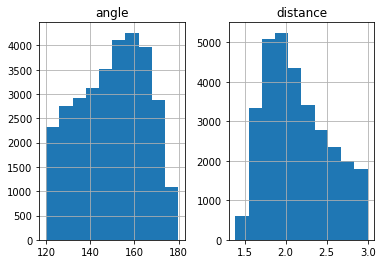

In [34]:
h.generate_table()
import pandas as pd
df = pd.DataFrame.from_records(h.table)
df.hist(column=["angle", "distance"])

In [58]:
from MDAnalysis.analysis import hbonds
import matplotlib.pyplot as plt
H = u.select_atoms('name Hn')
O = u.select_atoms('name O')
N = u.select_atoms('name N')
hb_ac = hbonds.HydrogenBondAutoCorrel(u, acceptors = u.atoms.O,
            hydrogens = u.atoms.Hn, donors = u.atoms.N,bond_type='continuous',
            sample_time = 2, nruns = 20, nsamples = 1000)
hb_ac.run()
hb_ac.solve()
tau = hb_ac.solution['tau']
time = hb_ac.solution['time']
results = hb_ac.solution['results']
estimate = hb_ac.solution['estimate']
plt.plot(time, results, 'ro')
plt.plot(time, estimate)
plt.show()

AttributeError: AtomGroup has no attribute Hn

MET1-N -- ASP104-OD2
MET1-N -- ASN79-O
ARG2-N -- ASP104-OD1
ARG2-N -- ASP104-OD2
ARG2-NH1 -- ASP104-OD1


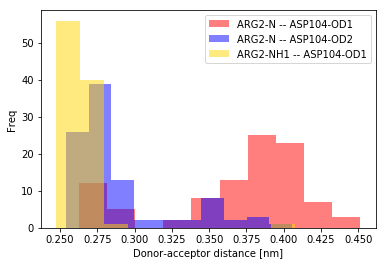

In [15]:
## MDTraj
%matplotlib inline
import matplotlib.pyplot as plt
import itertools
import mdtraj as mdt

hbonds = mdt.baker_hubbard(t, periodic=False)
label = lambda hbond : '%s -- %s' % (t.topology.atom(hbond[0]), t.topology.atom(hbond[2]))
for hbond in hbonds[:5]:
    print(label(hbond))
    
da_distances = mdt.compute_distances(t, hbonds[:, [0,2]], periodic=False)

color = itertools.cycle(['r', 'b', 'gold'])
for i in [2, 3, 4]:
    plt.hist(da_distances[:, i], color=next(color), label=label(hbonds[i]), alpha=0.5)
plt.legend()
plt.ylabel('Freq');
plt.xlabel('Donor-acceptor distance [nm]')

plt.show()

In [1]:
## PyTraj
# search hbonds for all residues
hbonds = mdp.search_hbonds(p)
print(hbonds)
print(hbonds.donor_acceptor[:5])
print(hbonds.values[:5])
# search hbonds between residue 9 and 16
h = mdp.search_hbonds(p, ':2,104')
h.donor_acceptor

NameError: name 'mdp' is not defined

In [96]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rcParams['axes.labelcolor'] =  'green' # default green for label
matplotlib.rcParams['axes.linewidth'] =  0.5
from matplotlib import pyplot as plt
import seaborn as sb # add seaborn for pretty plot (vs default one in matplotlib)

In [93]:
# find hbond
hb = mdp.hbond(p)

distance_mask = hb.get_amber_mask()[0]
print('hbond distance mask: {} \n '.format(distance_mask))

angle_mask = hb.get_amber_mask()[1]
print('hbond angle mask: {} \n'.format(angle_mask))

print("hbond data")
print(hb.data) # 1: have hbond; 0: does not have hbond

hbond distance mask: [':104@OD2 :2@HN' ':81@O :3@HN' ':105@O :4@HN' ... ':67@O :71@HN'
 ':76@OD1 :71@HH12' ':133@OH :147@HN'] 
 
hbond angle mask: [':104@OD2 :2@HN :2@N' ':81@O :3@HN :3@N' ':105@O :4@HN :4@N' ...
 ':67@O :71@HN :71@N' ':76@OD1 :71@HH12 :71@NH1' ':133@OH :147@HN :147@N'] 

hbond data
<pytraj.DatasetList with 552 datasets>
total_solute_hbonds
[118 128 135 ... 148 150 145]

ASP104_OD2-ARG2_N-HN
[1 1 1 ... 1 1 1]

PHE81_O-ILE3_N-HN
[1 1 0 ... 1 1 1]
...

ASP76_OD1-ARG71_NH1-HH12
[0 0 0 ... 0 0 1]

TYR133_OH-ASP147_N-HN
[0 0 0 ... 0 0 1]


In [94]:
# compute distance between donor-acceptor for ALL frames (also include frames that do not form hbond)
dist = mdp.distance(p, hb.get_amber_mask()[0])
print('all hbond distances: ', dist)

angle = mdp.angle(p, hb.get_amber_mask()[1])
angle

all hbond distances:  [[1.98754931 1.56073233 1.6815119  ... 1.87668287 1.92771458 1.78278138]
 [1.85744864 1.90687541 2.04047458 ... 1.92784523 1.95871392 1.72493336]
 [1.94602751 2.15130963 2.05459743 ... 2.23928736 2.06743339 2.1184575 ]
 ...
 [2.68282589 2.67913023 2.51698551 ... 2.33333877 2.12996803 1.91349631]
 [2.53111223 2.34864368 2.52764763 ... 2.76315326 2.76062652 2.00224497]
 [2.21117989 2.48876439 2.64414217 ... 2.54070422 2.39728921 1.88778082]]


array([[155.20187548, 153.51493071, 151.21201558, ..., 152.11429421,
        138.78793393, 143.96295219],
       [164.31172882, 152.87553448, 167.68379789, ..., 159.41529836,
        156.21898494, 174.78138007],
       [164.05180661, 159.46511619, 152.61778869, ..., 146.44248071,
        151.56788281, 150.69966586],
       ...,
       [127.87623639, 141.35717369, 137.17378599, ..., 119.99299548,
        127.74139355, 151.70940911],
       [135.36423224, 131.59008338, 126.60784987, ..., 125.35729868,
        119.53810854, 139.61907671],
       [166.07627117, 144.6705497 , 142.12177068, ..., 161.31049247,
        176.882528  , 155.54166594]])

Text(0,0.5,':5@O :3@HG1')

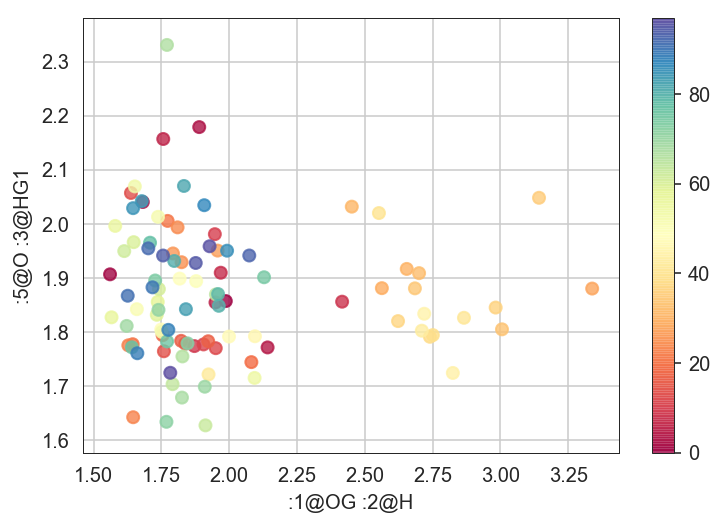

In [98]:
sb.color_palette('deep', n_colors=6, desat=0.5)
sb.set_style(style='white')

# scatter plot for distance between ':1@OG :2@H' and ':5@O :3@HG1'
# the point is colored by frame number (total frame = traj.n_frames (101))
fig = plt.scatter(dist[0], dist[1], marker='o', c=range(p.n_frames), alpha=0.8, cmap='Spectral')
plt.colorbar()
plt.grid()
plt.xlabel(':1@OG :2@H')
plt.ylabel(':5@O :3@HG1')

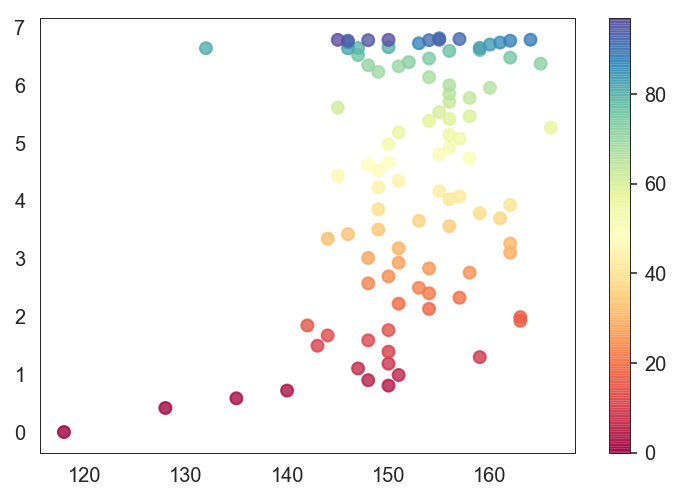

In [102]:
hbond_data = hb
rmsd_to_lowest_pdb = mdp.rmsd(p, ref=0, mask='@N,CA,C')
# plot total hbond number vs rmsd
# color by frame number
n_hbonds_per_frame = hbond_data.total_solute_hbonds()
fig = plt.scatter(n_hbonds_per_frame, rmsd_to_lowest_pdb, 
                  marker='o', c=range(traj.n_frames), alpha=0.8, cmap='Spectral')
plt.colorbar()

In [103]:
# get distance and angle mask for each hbond
h_dist_mask, h_angle_mask = hbond_data.get_amber_mask()
print(h_dist_mask)
print(h_angle_mask)

[':104@OD2 :2@HN' ':81@O :3@HN' ':105@O :4@HN' ... ':67@O :71@HN'
 ':76@OD1 :71@HH12' ':133@OH :147@HN']
[':104@OD2 :2@HN :2@N' ':81@O :3@HN :3@N' ':105@O :4@HN :4@N' ...
 ':67@O :71@HN :71@N' ':76@OD1 :71@HH12 :71@NH1' ':133@OH :147@HN :147@N']


In [105]:
# compute hbond distance
# use dtype='dataframe' to dump distance data to pandas' DataFrame
h_dist = mdp.distance(traj, h_dist_mask, dtype='dataframe')

# need to update mask
h_dist.columns = h_dist_mask

In [108]:
# just want to show some data
h_dist[[':104@OD2 :2@HN' ,':81@O :3@HN' ,':105@O :4@HN']].head(5)

,:104@OD2 :2@HN,:81@O :3@HN,:105@O :4@HN
0,1.987695,1.857586,1.945923
1,1.560573,1.907212,2.151043
2,1.681312,2.040814,2.054317
3,1.889411,2.179163,2.240783
4,2.142599,1.772442,2.113719


In [109]:
# stats
h_dist[[':104@OD2 :2@HN' ,':81@O :3@HN' ,':105@O :4@HN']].describe()

,:104@OD2 :2@HN,:81@O :3@HN,:105@O :4@HN
count,98.000000,98.000000,98.000000
mean,1.986306,1.872134,2.118749
std,0.403544,0.121764,0.181026
min,1.560573,1.627919,1.789119
25%,1.738387,1.783860,2.000959
50%,1.835206,1.856068,2.102299
75%,1.997358,1.948160,2.240275
max,3.338050,2.330692,2.601305


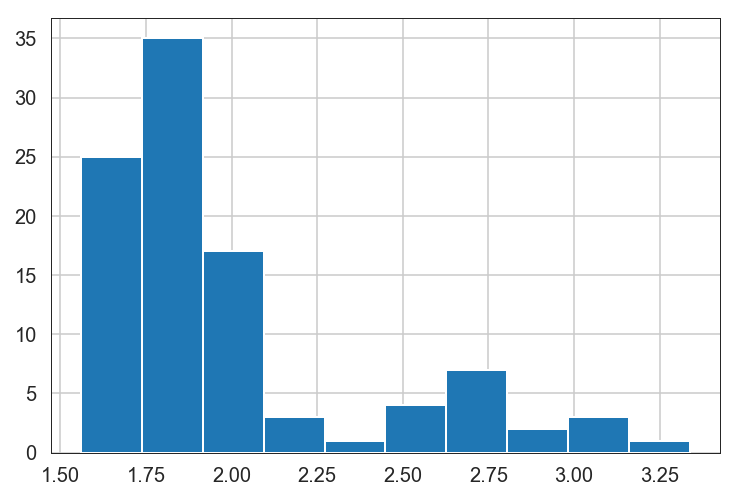

In [110]:
# plot
h_dist[':104@OD2 :2@HN'].hist()

In [112]:
h_dist[':104@OD2 :2@HN'].describe()

count    98.000000
mean      1.986306
std       0.403544
min       1.560573
25%       1.738387
50%       1.835206
75%       1.997358
max       3.338050
Name: :104@OD2 :2@HN, dtype: float64

In [102]:
# Filter frames that form hbond for specific donor-acceptor
# 1st pairs: SER1_OG-TRP2_N-H
h_values = hb.data['ASP104_OD2-ARG2_N-HN'].values # 1: For hbond; 0: not form hbond
print(h_values)

# filter distances from frames forming hbond
import numpy
h_frames = numpy.where(h_values==1)[0] # frame indices forming hbond
print('h_frames', h_frames)

arr = dist[0][h_frames]
print('hbond distance', arr)

print(numpy.mean(arr))
print(numpy.std(arr))

[1 1 1 ... 1 1 1]
('h_frames', array([ 0,  1,  2, ..., 95, 96, 97]))
('hbond distance', array([1.98754931, 1.56073233, 1.6815119 , ..., 1.87668287, 1.92771458,
       1.78278138]))
1.8039779428253986
0.13304047680656572


## Native Contacts
Using the definition from Best, Hummer, and Eaton, "Native contacts determine protein folding mechanisms in atomistic simulations" PNAS (2013)
http://dx.doi.org/10.1073/pnas.1311599110

('Number of native contacts', 2624)
average contacts = 0.946541786194


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: overflow encountered in exp


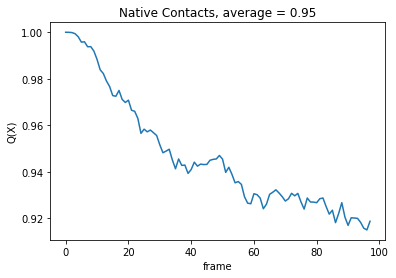

In [24]:
## MDTraj
import numpy as np
import mdtraj as mdt
from itertools import combinations

def best_hummer_q(traj, native):
    """Compute the fraction of native contacts according the definition from
    Best, Hummer and Eaton [1]
    
    Parameters
    ----------
    traj : md.Trajectory
        The trajectory to do the computation for
    native : md.Trajectory
        The 'native state'. This can be an entire trajecory, or just a single frame.
        Only the first conformation is used
        
    Returns
    -------
    q : np.array, shape=(len(traj),)
        The fraction of native contacts in each frame of `traj`
        
    References
    ----------
    ..[1] Best, Hummer, and Eaton, "Native contacts determine protein folding
          mechanisms in atomistic simulations" PNAS (2013)
    """
    
    BETA_CONST = 50  # 1/nm
    LAMBDA_CONST = 1.8
    NATIVE_CUTOFF = 0.45  # nanometers
    
    # get the indices of all of the heavy atoms
    # all, alpha, minimal, heavy, water
    heavy = native.topology.select_atom_indices('heavy')
    # get the pairs of heavy atoms which are farther than 3
    # residues apart
    heavy_pairs = np.array(
        [(i,j) for (i,j) in combinations(heavy, 2)
            if abs(native.topology.atom(i).residue.index - \
                   native.topology.atom(j).residue.index) > 3])
    
    # compute the distances between these pairs in the native state
    heavy_pairs_distances = mdt.compute_distances(native[0], heavy_pairs)[0]
    # and get the pairs s.t. the distance is less than NATIVE_CUTOFF
    native_contacts = heavy_pairs[heavy_pairs_distances < NATIVE_CUTOFF]
    print("Number of native contacts", len(native_contacts))
    
    # now compute these distances for the whole trajectory
    r = mdt.compute_distances(t, native_contacts)
    # and recompute them for just the native state
    r0 = mdt.compute_distances(native[0], native_contacts)
    
    q = np.mean(1.0 / (1 + np.exp(BETA_CONST * (r - LAMBDA_CONST * r0))), axis=1)
    return q

# just for example, use the first frame as the 'native' conformation
q = best_hummer_q(t, t[0])

%matplotlib inline
import matplotlib.pyplot as plt

average_contacts = np.mean(q)
print('average contacts = {}'.format(average_contacts))
# plot time series q(t)
f, ax = plt.subplots()
ax.plot(q)
ax.set(xlabel='frame', ylabel='Q(X)',
       title='Native Contacts, average = {:.2f}'.format(average_contacts))

f.show()

plt.show()

Number of native contacts = 98
average contacts = 0.481375074302


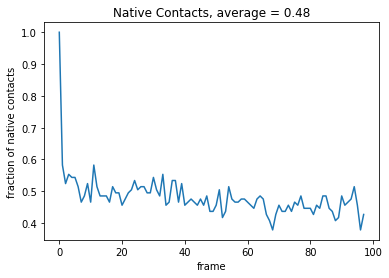

In [25]:
## MDAnalysis
import MDAnalysis as mda
from MDAnalysis.analysis import contacts
from MDAnalysis.tests.datafiles import PSF,DCD
import matplotlib.pyplot as plt
# example trajectory (transition of AdK from closed to open)
u = mda.Universe(PSF,DCD)
# crude definition of salt bridges as contacts between NH/NZ in ARG/LYS and
# OE*/OD* in ASP/GLU. You might want to think a little bit harder about the
# problem before using this for real work.
sel_basic = "(resname ARG LYS) and (name NH* NZ)"
sel_acidic = "(resname ASP GLU) and (name OE* OD*)"
# reference groups (first frame of the trajectory, but you could also use a
# separate PDB, eg crystal structure)
acidic = u.select_atoms(sel_acidic)
basic = u.select_atoms(sel_basic)
# set up analysis of native contacts ("salt bridges"); salt bridges have a
# distance <6 A
ca1 = contacts.Contacts(u, selection=(sel_acidic, sel_basic),
                        refgroup=(acidic, basic), radius=6.0)
# iterate through trajectory and perform analysis of "native contacts" Q
ca1.run()
# print number of averave contacts
average_contacts = np.mean(ca1.timeseries[:, 1])
print('Number of native contacts = {}'.format(len(ca1.timeseries[:, 1])))
print('average contacts = {}'.format(average_contacts))
# plot time series q(t)
f, ax = plt.subplots()
ax.plot(ca1.timeseries[:, 0], ca1.timeseries[:, 1])
ax.set(xlabel='frame', ylabel='fraction of native contacts',
       title='Native Contacts, average = {:.2f}'.format(average_contacts))

f.show()

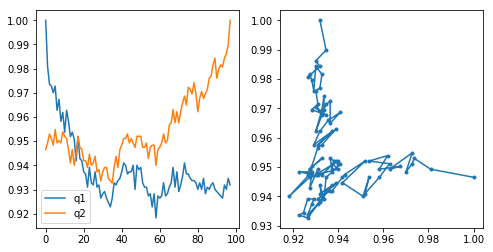

In [26]:
import MDAnalysis as mda
from MDAnalysis.analysis import contacts
from MDAnalysisTests.datafiles import PSF, DCD
u = mda.Universe(PSF, DCD)
q1q2 = contacts.q1q2(u, 'name CA', radius=8)
q1q2.run()

f, ax = plt.subplots(1, 2, figsize=plt.figaspect(0.5))
ax[0].plot(q1q2.timeseries[:, 0], q1q2.timeseries[:, 1], label='q1')
ax[0].plot(q1q2.timeseries[:, 0], q1q2.timeseries[:, 2], label='q2')
ax[0].legend(loc='best')
ax[1].plot(q1q2.timeseries[:, 1], q1q2.timeseries[:, 2], '.-')
f.show()

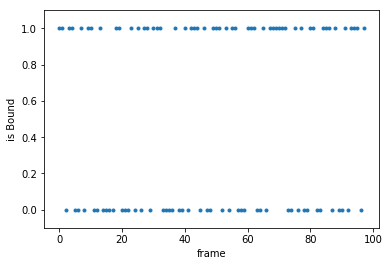

In [30]:
# crude definition of salt bridges as contacts between NH/NZ in ARG/LYS and
# OE*/OD* in ASP/GLU. You might want to think a little bit harder about the
# problem before using this for real work.
def is_any_closer(r, r0, dist=2.5):
    return np.any(r < dist)

sel_basic = "(resname ARG LYS) and (name NH* NZ)"
sel_acidic = "(resname ASP GLU) and (name OE* OD*)"

# reference groups (first frame of the trajectory, but you could also use a
# separate PDB, eg crystal structure)
acidic = u.select_atoms(sel_acidic)
basic = u.select_atoms(sel_basic)

nc = contacts.Contacts(u, selection=(sel_acidic, sel_basic),
                       method=is_any_closer,
                       refgroup=(acidic, basic), kwargs={'dist': 2.5})
nc.run()

bound = nc.timeseries[:, 1]
frames = nc.timeseries[:, 0]

f, ax = plt.subplots()

ax.plot(frames, bound, '.')
ax.set(xlabel='frame', ylabel='is Bound',
       ylim=(-0.1, 1.1))

f.show()

## Correlation Matrix

In [33]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
mat = mdp.matrix.covar(p, '@CA')
mat

array([[ 1.09533799, -0.47115528,  0.25700764, ...,  1.82387069,
        -0.70176982,  0.37209927],
       [-0.47115528,  0.3156158 , -0.17515628, ..., -0.84490382,
         0.3213538 , -0.21713956],
       [ 0.25700764, -0.17515628,  0.23081533, ...,  0.49042274,
        -0.16048877,  0.19277208],
       ..., 
       [ 1.82387069, -0.84490382,  0.49042274, ...,  3.23327509,
        -1.2898835 ,  0.63478242],
       [-0.70176982,  0.3213538 , -0.16048877, ..., -1.2898835 ,
         0.6898137 , -0.15767807],
       [ 0.37209927, -0.21713956,  0.19277208, ...,  0.63478242,
        -0.15767807,  0.27905384]])

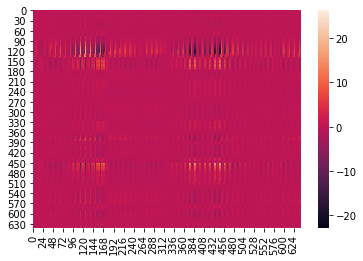

In [38]:
# adapted from: https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))
f, ax = plt.subplots()
## Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(mat)
## Draw the heatmap with correct aspect ratio
#sns.heatmap(mat, cmap=cmap, vmax=.3,
#            square=True, xticklabels=5, yticklabels=5,
#            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
#plt.savefig('matrix_covar.png')

## PCA

(98, 2)


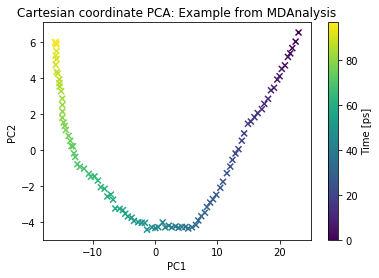

In [7]:
## MDTraj
%matplotlib inline
import mdtraj as mdt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca1 = PCA(n_components=2)
t.superpose(t, 0)

reduced_cartesian = pca1.fit_transform(t.xyz.reshape(t.n_frames, t.n_atoms * 3))
print(reduced_cartesian.shape)

plt.figure()
plt.scatter(reduced_cartesian[:, 0], reduced_cartesian[:,1], marker='x', c=t.time)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cartesian coordinate PCA: Example from MDAnalysis')
cbar = plt.colorbar()
cbar.set_label('Time [ps]')

(98, 5579470)


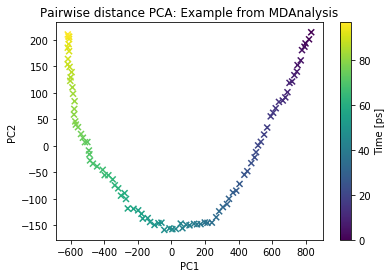

In [9]:
pca2 = PCA(n_components=2)

from itertools import combinations
# this python function gives you all unique pairs of elements from a list

atom_pairs = list(combinations(range(t.n_atoms), 2))
pairwise_distances = mdt.geometry.compute_distances(t, atom_pairs)
print(pairwise_distances.shape)
reduced_distances = pca2.fit_transform(pairwise_distances)

plt.figure()
plt.scatter(reduced_distances[:, 0], reduced_distances[:,1], marker='x', c=t.time)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Pairwise distance PCA: Example from MDAnalysis')
cbar = plt.colorbar()
cbar.set_label('Time [ps]')

In [72]:
## PyTraj

# compute pca
data = mdp.pca(p, mask='!@H=', n_vecs=2)
print('projection values of each frame to first mode = {} \n'.format(data[0][0]))
print('projection values of each frame to second mode = {} \n'.format(data[0][1]))
print('eigvenvalues of first two modes', data[1][0])
print("")
print('eigvenvectors of first two modes: \n', data[1][1])

projection values of each frame to first mode = [-162.84335  -159.48402  -155.81532  ...  111.06882   111.598404
  111.73182 ] 

projection values of each frame to second mode = [43.37953  39.49763  36.765785 ... 38.35827  38.207832 38.978493] 

('eigvenvalues of first two modes', array([8084.95513346,  522.89602599]))

('eigvenvectors of first two modes: \n', array([[ 0.01082795, -0.00390038,  0.00326272, ...,  0.01920533,
        -0.00658452,  0.00063922],
       [-0.00654205,  0.01194339, -0.00567693, ..., -0.01570529,
         0.00541114, -0.00214816]]))


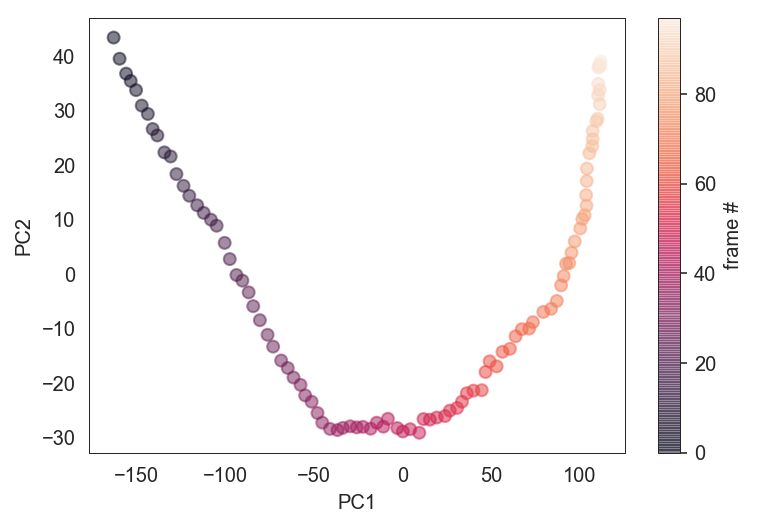

In [118]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # high resolution
import matplotlib

projection_data = data[0]
from matplotlib import pyplot as plt

plt.scatter(projection_data[0], projection_data[1], marker='o', c=range(p.n_frames), alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
cbar = plt.colorbar()
cbar.set_label('frame #')

## Ramachandran

In [15]:
## MDTraj
atoms, bonds = t.topology.to_dataframe()
atoms[:5]

,serial,name,element,resSeq,resName,chainID,segmentID
0,None,N,N,1,MET,0,4AKE
1,None,H,H,1,MET,0,4AKE
2,None,H2,H,1,MET,0,4AKE
3,None,H3,H,1,MET,0,4AKE
4,None,CA,C,1,MET,0,4AKE


In [24]:
psi_indices, phi_indices = [6, 8, 14, 16], [4, 6, 8, 14]
angles = mdt.compute_dihedrals(t, [phi_indices, psi_indices])

(-3.141592653589793, 3.141592653589793)

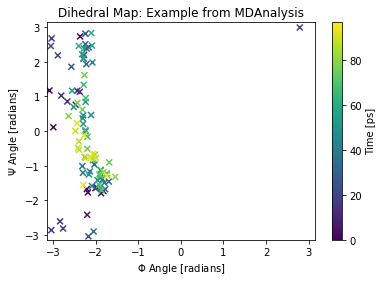

In [25]:
from pylab import *
from math import pi

figure()
title('Dihedral Map: Example from MDAnalysis')
scatter(angles[:, 0], angles[:, 1], marker='x', c=t.time)
cbar = colorbar()
cbar.set_label('Time [ps]')
xlabel(r'$\Phi$ Angle [radians]')
xlim(-pi, pi)
ylabel(r'$\Psi$ Angle [radians]')
ylim(-pi, pi)

In [121]:
## PyTraj
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

# calculate phi/psi for Gly residues
# need to get indcies of Gly residues
indices = [idx for idx, res in enumerate(p.top.residues) if 'GLY' in res.name]
print('Gly residue indices = ', indices)

dataset = mdp.multidihedral(p, 'phi psi', resrange=indices[:5])
print(dataset)

('Gly residue indices = ', [6, 9, 11, 13, 24, 31, 41, 45, 55, 79, 84, 99, 121, 129, 143, 149, 179, 188, 197, 213])
<pytraj.DatasetList with 10 datasets>
phi:7
[ 99.6264634   73.36307732  77.24256895 ... 153.82052795 129.57508673
 158.87994524]

psi:7
[-179.26295277 -167.94777578 -174.89759838 ...  162.83336026  164.49747852
  152.89625058]

phi:10
[-168.57382615 -136.66422578  -92.73673375 ...  167.38135426  165.57612799
  146.25462541]
...

phi:25
[77.98582247 64.41692299 60.40400464 ... 69.88809429 61.55591703
 73.31799543]

psi:25
[28.63851132 45.53830773 41.9479137  ... 34.44646932 62.9117203
 43.81632937]


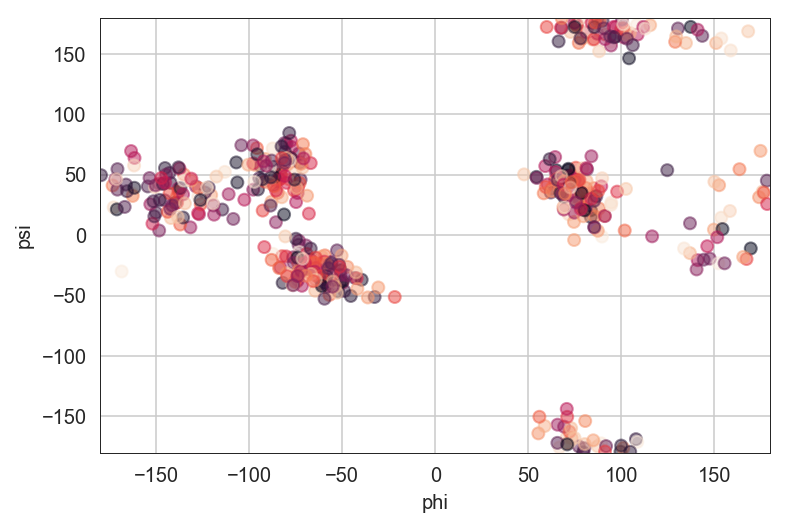

In [123]:
# take data for 'phi' and flatten to 1D array
phi = np.array([d.values for d in dataset if 'phi' in d.key]).flatten()

# take data for 'psi' and flatten to 1D array
psi = np.array([d.values for d in dataset if 'psi' in d.key]).flatten()

# setup color
colors = np.random.rand(len(psi))

plt.xlim([-180, 180])
plt.ylim([-180, 180])
plt.xlabel('phi')
plt.ylabel('psi')
plt.grid()
plt.scatter(phi, psi, alpha=0.5, c=colors)

plt.show()

(-127.41345797688375, 131.9979734831722, 98)


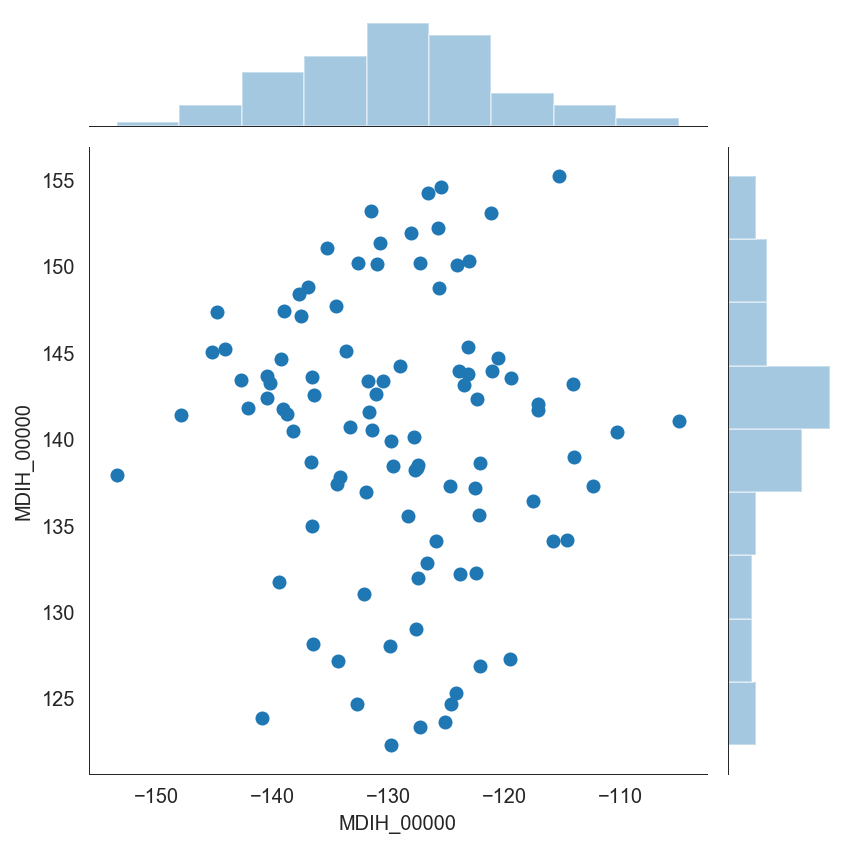

In [129]:
# only plot for residue 2 (python uses 0-based index)
phi, psi = mdp.multidihedral(p, resrange=[2,], dihedral_types='psi phi')
print(phi[0], psi[0], len(psi))

from matplotlib import pyplot as plt
import seaborn as snb
snb.jointplot(phi, psi, kind='scatter', stat_func=None)
#plt.savefig('phipsi_ala3.png')

## Solvent Accessible Surface Area (SASA)

In [31]:
## MDTraj
sasa = mdt.shrake_rupley(t)
print(t)
print('sasa data shape', sasa.shape)

<mdtraj.Trajectory with 98 frames, 3341 atoms, 214 residues, without unitcells>
('sasa data shape', (98, 3341))


(98,)


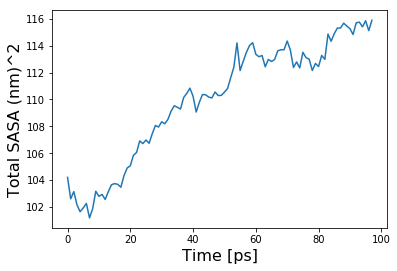

In [34]:
total_sasa  = sasa.sum(axis=1)
print(total_sasa.shape)

import matplotlib.pylab as plt
plt.plot(t.time, total_sasa)
plt.xlabel('Time [ps]', size=16)
plt.ylabel('Total SASA (nm)^2', size=16)
show()

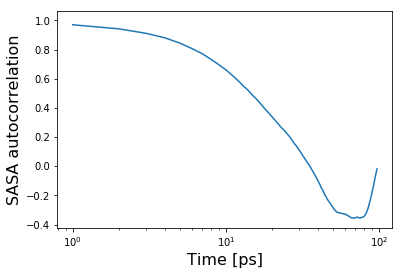

In [36]:
def autocorr(x):
    "Compute an autocorrelation with numpy"
    x = x - np.mean(x)
    result = np.correlate(x, x, mode='full')
    result = result[result.size//2:]
    return result / result[0]

semilogx(t.time, autocorr(total_sasa))
xlabel('Time [ps]', size=16)
ylabel('SASA autocorrelation', size=16)
show()

## Radial distribution function of waters

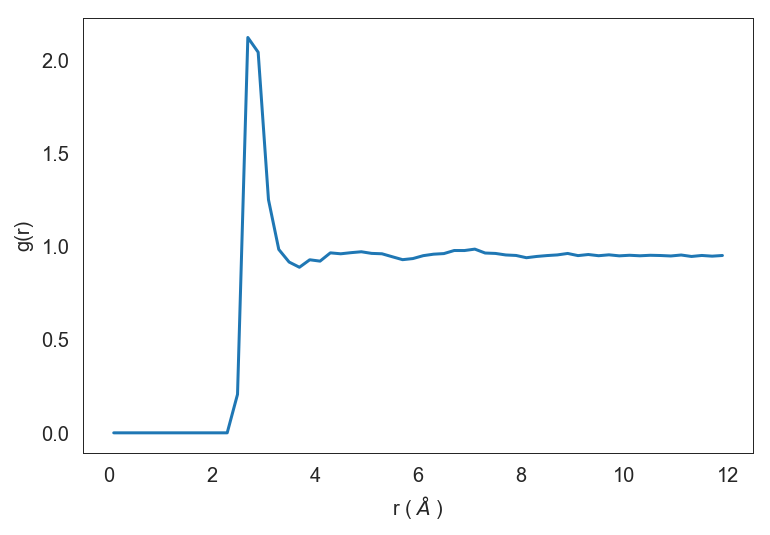

In [141]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # high resolution
import matplotlib
from matplotlib import pyplot as plt
p2 = mdp.load_sample_data('tz2')
rdf_data = mdp.rdf(p2, solvent_mask=':WAT@O', 
                   solute_mask=':WAT@O', bin_spacing=0.2,
                   maximum=12.)

plt.plot(rdf_data[0], rdf_data[1])
plt.xlabel(r"r ( $\AA$ )")
plt.ylabel('g(r)')
#plt.savefig('rdf_tz2_ortho.png')

## Domain move

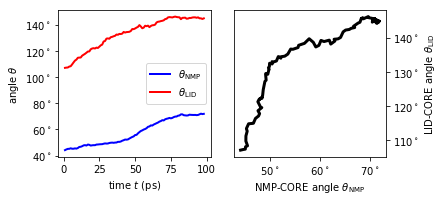

In [16]:
## MDAnalysis
%matplotlib inline
import numpy as np
from numpy.linalg import norm

def theta_NMP(u):
    """Calculate the NMP-CORE angle for E. coli AdK in degrees"""
    C = u.select_atoms("resid 115-125 and (backbone or name CB)").center_of_geometry()
    B = u.select_atoms("resid 90-100 and (backbone or name CB)").center_of_geometry()
    A = u.select_atoms("resid 35-55 and (backbone or name CB)").center_of_geometry()
    BA = A - B
    BC = C - B
    theta = np.arccos(np.dot(BA, BC)/(norm(BA)*norm(BC)))
    return np.rad2deg(theta)

def theta_LID(u):
    """Calculate the LID-CORE angle for E. coli AdK in degrees"""
    C = u.select_atoms("resid 179-185 and (backbone or name CB)").center_of_geometry()
    B = u.select_atoms("resid 115-125 and (backbone or name CB)").center_of_geometry()
    A = u.select_atoms("resid 125-153 and (backbone or name CB)").center_of_geometry()
    BA = A - B
    BC = C - B
    theta = np.arccos(np.dot(BA, BC)/(norm(BA)*norm(BC)))
    return np.rad2deg(theta)

if __name__ == "__main__":
    import MDAnalysis
    from MDAnalysis.tests.datafiles import PSF, DCD
    import matplotlib
    import matplotlib.pyplot as plt

    u = MDAnalysis.Universe(PSF, DCD)
    data = np.array([(u.trajectory.time, theta_NMP(u), theta_LID(u)) for ts in u.trajectory])
    time, NMP, LID = data.T


    # plotting
    degreeFormatter = matplotlib.ticker.FormatStrFormatter(r"%g$^\circ$")
    fig = plt.figure(figsize=(6,3))

    ax1 = fig.add_subplot(121)
    ax1.plot(time, NMP, 'b-', lw=2, label=r"$\theta_{\mathrm{NMP}}$")
    ax1.plot(time, LID, 'r-', lw=2, label=r"$\theta_{\mathrm{LID}}$")
    ax1.set_xlabel(r"time $t$ (ps)")
    ax1.set_ylabel(r"angle $\theta$")
    ax1.yaxis.set_major_formatter(degreeFormatter)
    ax1.legend(loc="best")

    ax2 = fig.add_subplot(122)
    ax2.plot(NMP, LID, 'k-', lw=3)
    ax2.set_xlabel(r"NMP-CORE angle $\theta_{\mathrm{NMP}}$")
    ax2.set_ylabel(r"LID-CORE angle $\theta_{\mathrm{LID}}$")
    ax2.xaxis.set_major_formatter(degreeFormatter)
    ax2.yaxis.set_major_formatter(degreeFormatter)
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")

    fig.subplots_adjust(left=0.12, right=0.88, bottom=0.2, wspace=0.15)

    for ext in ('svg', 'pdf', 'png'):
        fig.savefig("NMP_LID_angle_projection.{0}".format(ext))

# Hole

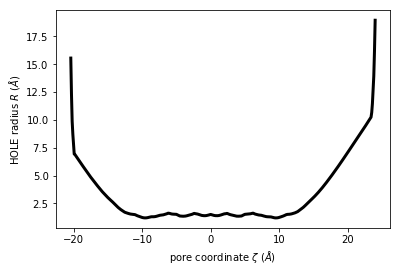

In [75]:
from MDAnalysis.analysis.hole import HOLE
from MDAnalysis.tests.datafiles import PDB_HOLE

H = HOLE(PDB_HOLE, executable="/Users/alsalas/Software/hole2/exe/hole")  # set path to your hole binary
H.run()
H.collect()
H.plot(linewidth=3, color="black", label=False)

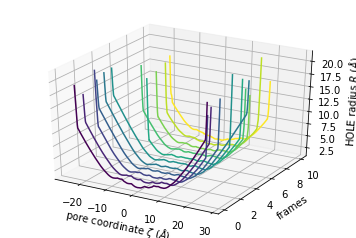

In [76]:
import MDAnalysis as mda
from MDAnalysis.analysis.hole import HOLEtraj
from MDAnalysis.tests.datafiles import MULTIPDB_HOLE

u = mda.Universe(MULTIPDB_HOLE)
H = HOLEtraj(u, executable="~/Software/hole2/exe/hole")
H.run()
H.plot3D()

In [82]:
import MDAnalysis as mda
from MDAnalysis.analysis.hole import HOLEtraj
from MDAnalysis.analysis.rms import RMSD

from MDAnalysis.tests.datafiles import PDB_HOLE, MULTIPDB_HOLE

mda.start_logging()
ref = mda.Universe(PDB_HOLE)    # reference structure
u = mda.Universe(MULTIPDB_HOLE) # trajectory

# calculate RMSD
R = RMSD(u, reference=ref, select="protein", weights='mass')
R.run()

# HOLE analysis with order parameters
H = HOLEtraj(u, orderparameters=R.rmsd[:,2],
             executable="~/Software/hole2/exe/hole")
H.run()

MDAnalysis  : INFO     MDAnalysis 0.18.0 STARTED logging to 'MDAnalysis.log'
MDAnalysis  : INFO     MDAnalysis 0.18.0 STARTED logging to 'MDAnalysis.log'
MDAnalysis  : INFO     MDAnalysis 0.18.0 STARTED logging to 'MDAnalysis.log'
MDAnalysis  : INFO     MDAnalysis 0.18.0 STARTED logging to 'MDAnalysis.log'
MDAnalysis  : INFO     MDAnalysis 0.18.0 STARTED logging to 'MDAnalysis.log'
MDAnalysis.analysis.rmsd: INFO     RMS calculation for 260 atoms.
MDAnalysis.analysis.rmsd: INFO     RMS calculation for 260 atoms.
MDAnalysis.analysis.rmsd: INFO     RMS calculation for 260 atoms.
MDAnalysis.analysis.rmsd: INFO     RMS calculation for 260 atoms.
MDAnalysis.analysis.rmsd: INFO     RMS calculation for 260 atoms.
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Starting preparation
MDAnalysis.analysis.base: INFO     Starting preparation
/User

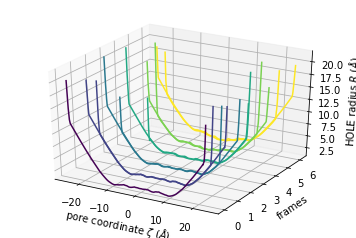

In [85]:
H.plot3D()

## Densidad de solvente

In [120]:
PSF = "/Users/alsalas/GDrive/Jupyter/Dynamics/Trayectorias/common/ubq_wb.psf"
DCD = "/Users/alsalas/GDrive/Jupyter/Dynamics/Trayectorias/run/ubq_wb_eq.dcd"
u3 = mda.Universe(PSF,DCD)
u3

<Universe with 7051 atoms>

In [125]:
from MDAnalysis.analysis.density import density_from_Universe
D = density_from_Universe(u3, delta=1.0, atomselection="name OH2")
D.convert_density('water')
D.export("water.dx", type="double")

MDAnalysis.analysis.density: INFO     Selected 1940 atoms out of 1940 atoms (name OH2) from 7051 total.
MDAnalysis.analysis.density: INFO     Selected 1940 atoms out of 1940 atoms (name OH2) from 7051 total.
MDAnalysis.analysis.density: INFO     Selected 1940 atoms out of 1940 atoms (name OH2) from 7051 total.
MDAnalysis.analysis.density: INFO     Selected 1940 atoms out of 1940 atoms (name OH2) from 7051 total.
MDAnalysis.analysis.density: INFO     Selected 1940 atoms out of 1940 atoms (name OH2) from 7051 total.
MDAnalysis.analysis.density: INFO     Selected 1940 atoms out of 1940 atoms (name OH2) from 7051 total.
Histogramming   1940 atoms in frame   100/100  [100.0%]
MDAnalysis.analysis.density: INFO     Density completed (initial density in Angstrom**-3)
MDAnalysis.analysis.density: INFO     Density completed (initial density in Angstrom**-3)
MDAnalysis.analysis.density: INFO     Density completed (initial density in Angstrom**-3)
MDAnalysis.analysis.density: INFO     Density comp

/private/var/folders/zz/qszdstsn58j7xv7cb3r2yfzc0000gn/T/tmp4dlfm1qv


In [129]:
import MDAnalysis
from MDAnalysis.analysis.waterdynamics import HydrogenBondLifetimes as HBL

selection1 = "name OH2 and sphzone 6.0 protein and resid 12"
selection2 = "resid 15"
HBL_analysis = HBL(u3, selection1, selection2, 0, 2000, 30)
HBL_analysis.run()
time = 0
#now we print the data ready to plot. The first two columns are the HBLc vs t
#plot and the second two columns are the HBLi vs t graph
for HBLc, HBLi in HBL_analysis.timeseries:
    print("{time} {HBLc} {time} {HBLi}".format(time=time, HBLc=HBLc, HBLi=HBLi))
    time += 1

#we can also plot our data
plt.figure(1,figsize=(18, 6))

#HBL continuos
plt.subplot(121)
plt.xlabel('time')
plt.ylabel('HBLc')
plt.title('HBL Continuos')
plt.plot(range(0,time),[column[0] for column in HBL_analysis.timeseries])

#HBL intermitent
plt.subplot(122)
plt.xlabel('time')
plt.ylabel('HBLi')
plt.title('HBL Intermitent')
plt.plot(range(0,time),[column[1] for column in HBL_analysis.timeseries])

plt.show()

MDAnalysis.analysis.hbonds: WARNING  Selection 1 'name OH2 and sphzone 6.0 protein and resid 12' did not select any atoms.
MDAnalysis.analysis.hbonds: WARNING  Selection 1 'name OH2 and sphzone 6.0 protein and resid 12' did not select any atoms.
MDAnalysis.analysis.hbonds: WARNING  Selection 1 'name OH2 and sphzone 6.0 protein and resid 12' did not select any atoms.
MDAnalysis.analysis.hbonds: WARNING  Selection 1 'name OH2 and sphzone 6.0 protein and resid 12' did not select any atoms.
MDAnalysis.analysis.hbonds: WARNING  Selection 1 'name OH2 and sphzone 6.0 protein and resid 12' did not select any atoms.
MDAnalysis.analysis.hbonds: WARNING  Selection 1 'name OH2 and sphzone 6.0 protein and resid 12' did not select any atoms.
MDAnalysis.analysis.hbonds: WARNING  Selection 2 "resid 15" did not select any atoms.
MDAnalysis.analysis.hbonds: WARNING  Selection 2 "resid 15" did not select any atoms.
MDAnalysis.analysis.hbonds: WARNING  Selection 2 "resid 15" did not select any atoms.
MDAn

IndexError: list index out of range